In [184]:
%matplotlib inline
import numpy as np
import pylab as pl
import scipy.special as special
from scipy.optimize import curve_fit
#import mpmath as mm
from scipy.integrate import quad
from scipy.integrate import nquad

# Set plot parameters to make beautiful plots
pl.rcParams['figure.figsize']  = 12, 7.5
pl.rcParams['lines.linewidth'] = 1.5
pl.rcParams['font.family']     = 'serif'
pl.rcParams['font.weight']     = 'bold'
pl.rcParams['font.size']       = 20  
pl.rcParams['font.sans-serif'] = 'serif'
#pl.rcParams['text.usetex']     = True
pl.rcParams['axes.linewidth']  = 1.5
pl.rcParams['axes.titlesize']  = 'medium'
pl.rcParams['axes.labelsize']  = 'medium'

pl.rcParams['xtick.major.size'] = 8     
pl.rcParams['xtick.minor.size'] = 4     
pl.rcParams['xtick.major.pad']  = 8     
pl.rcParams['xtick.minor.pad']  = 8     
pl.rcParams['xtick.color']      = 'k'     
pl.rcParams['xtick.labelsize']  = 'medium'
pl.rcParams['xtick.direction']  = 'in'    

pl.rcParams['ytick.major.size'] = 8     
pl.rcParams['ytick.minor.size'] = 4     
pl.rcParams['ytick.major.pad']  = 8     
pl.rcParams['ytick.minor.pad']  = 8     
pl.rcParams['ytick.color']      = 'k'     
pl.rcParams['ytick.labelsize']  = 'medium'
pl.rcParams['ytick.direction']  = 'in'    






#want to plot the integrand in Eq. 60 of the paper
#with filled in values of I(...), delta(yn), 

#constants in natural units
#m = 1.
#c = 1.
theta_e = 10.
#w without specific declear should of value 10
w = 10.
#theta_e_1 = 10.
#nu_c = 1
#B = 10.
#e = 1


#constants in Gaussian cgs units (values from harmony)
m = 9.1093826e-28
c = 2.99792458e10
e = 4.80320680e-10
B = 30.
#n_e = 4.
h = 6.6260755e-27
k = 1.380658e-16
T_e = m * c**2 * theta_e / k


#variables to be set (frequency, observer angle, width of delta function, electron number density, 
# sum index n)

kappa = 3.5
theta = 12.*np.pi/36.
epsilon = 0.01
n_e = 1.
nu_c = e * B / (2. * np.pi * m * c)
nu = 100 * nu_c
nu_s = (2./9.) * nu_c * theta_e**2 * np.sin(theta)
nu_k = nu_c * w**2. * np.sin(theta)
nu_w = nu_c * (w * kappa)**2 * np.sin(theta)



p_PL = 2.5
gamma_50_min = 1.
gamma_50_max = 1000.
#gamma_50_max = 100.
C = 1.
n_dn = (nu / nu_c) * abs(np.sin(theta))
Index_cutoff = 0.001

gamma_cutoff = 100000000000.
#print nu_c

In [185]:
data_pl_Q_abs_1_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_1_5_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_2_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_B_30_theta_30_60_n_1.txt')

data_pl_Q_abs_2_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_2_5_B_10_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_10_theta_30_60_n_1.txt')
data_pl_Q_abs_2_5_B_50_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_50_theta_30_60_n_1.txt')

data_pl_Q_abs_2_5_B_30_theta_20_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_30_theta_30_20_n_1.txt')
data_pl_Q_abs_2_5_B_30_theta_70_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_30_theta_30_70_n_1.txt')
data_pl_Q_abs_2_5_B_50_theta_40_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_2_5_B_50_theta_30_40_n_1.txt')





data_pl_Q_abs_3_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_3_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_3_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_3_5_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_4_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_4_B_30_theta_30_60_n_1.txt')

data_pl_Q_abs_4_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_4_5_B_30_theta_30_60_n_1.txt')

data_pl_Q_abs_4_5_B_10_theta_50_n_2 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_4_5_B_10_theta_30_50_n_2.txt')


data_pl_Q_abs_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_5_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_5_5_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_5_5_B_30_theta_30_60_n_1.txt')
data_pl_Q_abs_6_B_30_theta_60_n_1 = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/pl_Q_abs_6_B_30_theta_30_60_n_1.txt')






In [186]:
def jnu_58(nuratio):
    nu = nuratio * nu_c
    first_part       = n_e * (e**2 * nu_c /c)
    second_part_nume = 3.**(p_PL/2.) * (p_PL - 1.) * np.sin(theta)
    second_part_demo = 2. * (p_PL + 1.) * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL))
    second_part      = second_part_nume/second_part_demo
    third_part       = special.gamma((3. * p_PL - 1.)/ 12.) * special.gamma((3. * p_PL + 19.)/12.)
    fourth_part      = (nu/(nu_c * np.sin(theta)))**(- (p_PL - 1.)/2.)
    ans              = first_part * second_part * third_part * fourth_part
    return ans

def anu_59(nuratio):
    nu = nuratio * nu_c
    first_term = n_e * (e**2 / (nu * m * c))
    second_term = 3.**((p_PL + 1.)/2.) * (p_PL - 1.) / (4. * (gamma_50_min**(1. - p_PL) - gamma_50_max**(1. - p_PL)))
    third_term = special.gamma((3. * p_PL + 2.) / 12.)
    fourth_term = special.gamma((3. * p_PL + 22.) / 12.)
    fifth_term = (nu / (nu_c * np.sin(theta)))**(- (p_PL + 2.)/2.)
    ans = first_term * second_term * third_term * fourth_term * fifth_term
    return ans



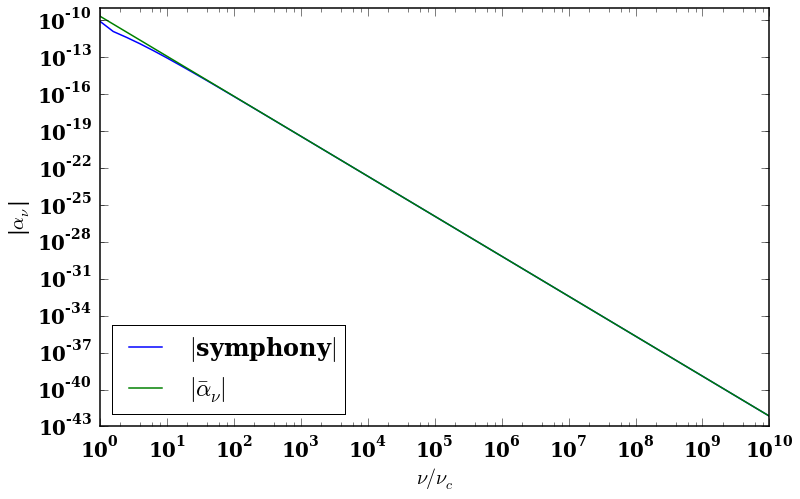

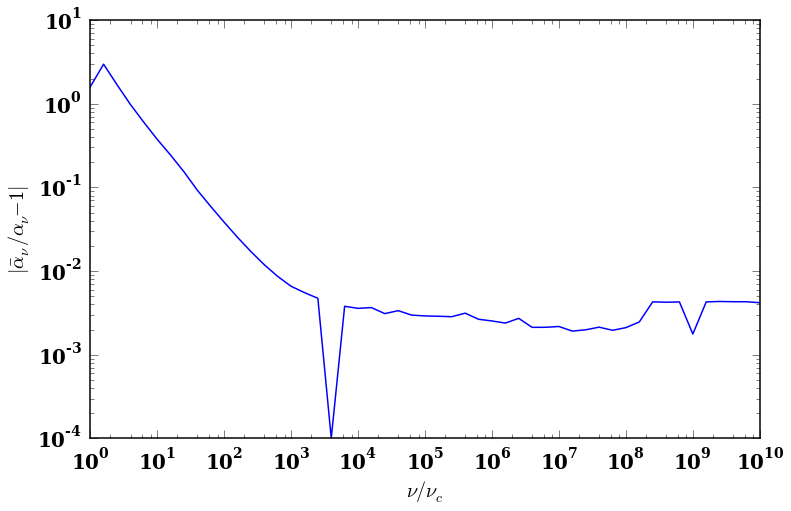

In [189]:
x_3 = data_pl_Q_abs_2_5_B_30_theta_60_n_1[:,0]
y_3 = -data_pl_Q_abs_2_5_B_30_theta_60_n_1[:,1]

#AA = (0.03370364 * p_PL - 0.03445771)**0.0860215 

AA = (17./500. * p_PL - 43./1250.)**(43./500.)



def Q_pl_abs(nuratio):
    f = AA * anu_59(nuratio)
    return f
    
    
pl.loglog(x_3, y_3, label = '$|$symphony$|$')
pl.loglog(x_3, Q_pl_abs(x_3), label = '$|\\bar{\\alpha}_{\\nu}|$')
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("|$\\alpha_\\nu$|")
pl.legend(loc = 'lower left')
pl.show()

pl.loglog(x_3, abs(Q_pl_abs(x_3)/y_3 - 1.))
pl.xlabel("$\\nu/\\nu_c$")
pl.ylabel("$|\\bar{\\alpha}_\\nu / \\alpha_{\\nu} - 1|$")
pl.legend()
pl.show()

#pl.ylim([-0.4, 0.4])


(array([ 0.03370364, -0.03445771,  0.0860215 ]), array([[  1.07968109e-05,  -4.24070180e-06,   1.45875855e-05],
       [ -4.24070180e-06,   2.90107987e-06,  -4.94538776e-06],
       [  1.45875855e-05,  -4.94538776e-06,   2.03624141e-05]]))
(array([ 0.36889163,  1.00049597,  0.94082052]), array([[ 0.05599547,  0.08084875,  0.00297488],
       [ 0.08084875,  0.1171273 ,  0.00437853],
       [ 0.00297488,  0.00437853,  0.00017762]]))


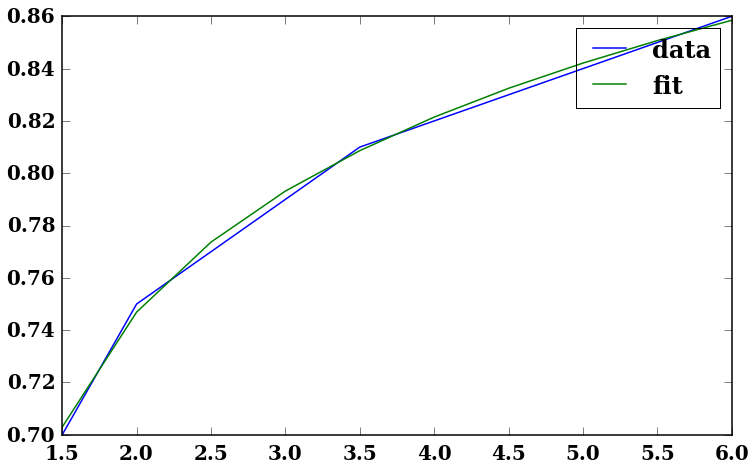

In [178]:
data_AA_fit = np.loadtxt('/home/zhaowei/Documents/data_summer/power_law_Q_mode/AA_fit.txt')

x_33 = data_AA_fit[:,0]
y_33 = data_AA_fit[:,1]

def fun_69(x, a, b, c):
    f = (a*x + b)**c
    return f

print curve_fit(fun_69, x_33, y_33, p0 = [0.0337036 , -0.0344577 ,  0.08602145])


def fun_70(x, a, b, d):
    f = d * (x+a)/(x+b)
    return f

print curve_fit(fun_70, x_33, y_33, p0 = [1.38614698,  2.56879415, 1])



pl.plot(x_33, y_33, label = 'data')
pl.plot(x_33, fun_69(x_33,  17./500., -43./1250.,  43./500. ), label = 'fit')
#pl.plot(x_33, fun_70(x_33, 9./25.,  1.00049597,  0.94082052), label = 'new')
pl.legend()